<a href="https://colab.research.google.com/github/newbie0309/DSCover-2022-2-Main-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 파이썬 버전
import sys
print(sys.version)

3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


# 모델링 1

In [ ]:
# OS 버전
import platform 
platform.platform()

'Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic'

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 31.9 MB/s 
     |████████████████████████████████| 209 kB 54.4 MB/s 
     |████████████████████████████████| 81 kB 9.8 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 147 kB 22.6 MB/s 
     |████████████████████████████████| 112 kB 55.1 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=52bde9fd51271005d660b15f3404327da42feabfb63a52756f1eb029f8d71f78
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import optuna
from optuna import Trial, visualization
from sklearn.metrics import mean_absolute_error

import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import GradientBoostingClassifier as GBC

import lightgbm as lgb

!pip install workalendar
from workalendar.asia import SouthKorea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 26.5 MB/s 
     |████████████████████████████████| 70 kB 7.8 MB/s 


In [ ]:
!pip install pmdarima # ARIMA를 다루는 패키지

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 33.6 MB/s 
     |████████████████████████████████| 9.9 MB 37.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
# plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm # 통계 라이브러리.
from pmdarima.arima import auto_arima # ARIMA
from statsmodels.tsa.arima_model import ARIMA # tsa = Time Series Analysis
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as SNS # 시각화
%matplotlib inline

import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
total = pd.read_csv('/content/drive/MyDrive/2022-2 Dscover 프로젝트/final project/한국가스공사_시간별 공급량_20181231.csv', encoding='cp949')

In [ ]:
total

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


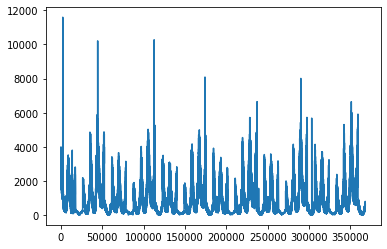

In [ ]:
plt.plot(total['공급량'])

In [ ]:
data = total.rename(columns={'연월일': 'Date', '공급량': 'sum'}) #컬럼명 대체
data['Date'] = pd.to_datetime(data['Date']) # month라는 컬럼을 datetime 형으로 변환
data = data.set_index('Date') # month 컬럼을 인덱스로 설정.


In [ ]:
data.head()

,시간,구분,sum
Date,,,
2013-01-01,1,A,2497.129
2013-01-01,2,A,2363.265
2013-01-01,3,A,2258.505
2013-01-01,4,A,2243.969
2013-01-01,5,A,2344.105


In [ ]:
data.describe()

,시간,sum
count,368088.000000,368088.000000
mean,12.500000,948.100037
std,6.922196,927.211578
min,1.000000,1.378000
25%,6.750000,221.973000
50%,12.500000,637.014000
75%,18.250000,1398.919000
max,24.000000,11593.617000


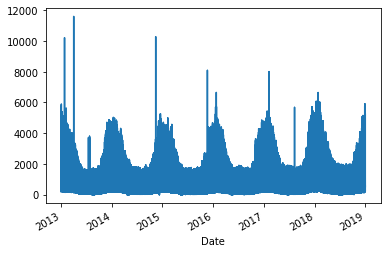

In [ ]:
data['sum'].plot()

In [ ]:
data['sum'].isnull().value_counts()

False    368088
Name: sum, dtype: int64

In [ ]:
data.head()

,시간,구분,sum
Date,,,
2013-01-01,1,A,2497.129
2013-01-01,2,A,2363.265
2013-01-01,3,A,2258.505
2013-01-01,4,A,2243.969
2013-01-01,5,A,2344.105


In [ ]:
daily_groups = data.resample('D')
daily_data = daily_groups.mean()

In [ ]:
daily_data.columns

Index(['시간', 'sum'], dtype='object')

In [ ]:
daily_data

,시간,sum
Date,,
2013-01-01,12.5,1958.761619
2013-01-02,12.5,2336.659952
2013-01-03,12.5,2560.321333
2013-01-04,12.5,2515.686048
2013-01-05,12.5,2285.946429
...,...,...
2018-12-27,12.5,2284.040345
2018-12-28,12.5,2427.115863
2018-12-29,12.5,2208.099351


In [ ]:

daily_data = daily_data.drop(['시간'], axis = 1)

In [ ]:
daily_data.shape

(2191, 1)

In [ ]:
daily_data

,sum
Date,
2013-01-01,1958.761619
2013-01-02,2336.659952
2013-01-03,2560.321333
2013-01-04,2515.686048
2013-01-05,2285.946429
...,...
2018-12-27,2284.040345
2018-12-28,2427.115863
2018-12-29,2208.099351


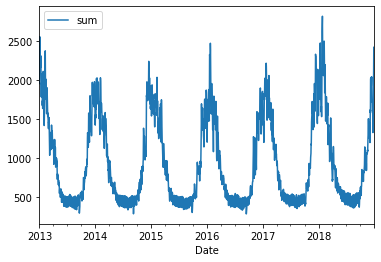

In [ ]:
daily_data.plot() #계절성이 있어보이는 데이터 

#데이터 탐색 

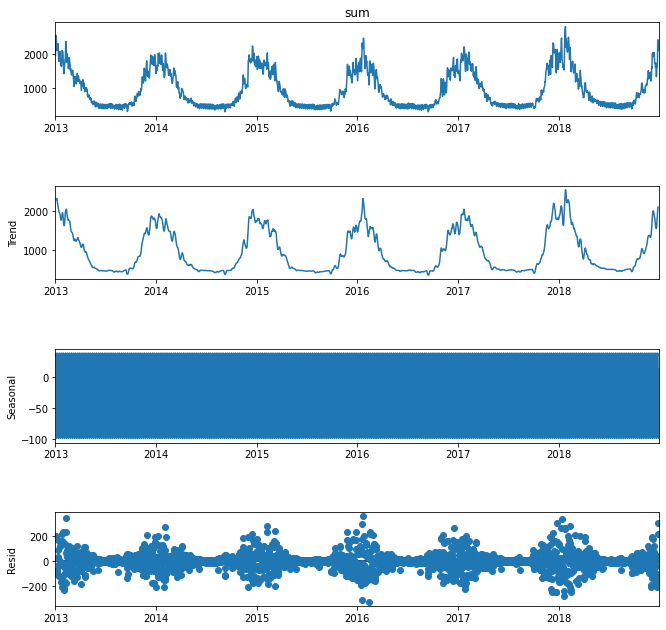

In [ ]:
## Decomposition: 시계열 분해
# tsa = time series analysis => s
decomposition = sm.tsa.seasonal_decompose(daily_data['sum'], model='additive') # seasonal_decompose: 시계열 데이터를 분해
fig = decomposition.plot() # 시각화
fig.set_size_inches(10, 10)
plt.show() # show
#원래 데이터 / 추세 / 계절성 / 잔차 순서로 출력

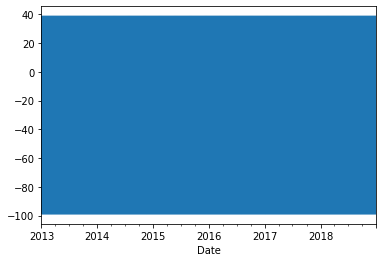

In [ ]:
decomposition.seasonal .dropna().plot() #특정 데이터만 시각화. plot()없이 출력만 하면 앞뒤가 잘리기 때문에 NaN값이 반환됨

In [ ]:
help(decomposition) #뽑을 수 있는 성분들을 확인할 수 있다.

Help on DecomposeResult in module statsmodels.tsa.seasonal object:

class DecomposeResult(builtins.object)
 |  DecomposeResult(observed, seasonal, trend, resid, weights=None)
 |  
 |  Results class for seasonal decompositions
 |  
 |  Parameters
 |  ----------
 |  observed : array_like
 |      The data series that has been decomposed.
 |  seasonal : array_like
 |      The seasonal component of the data series.
 |  trend : array_like
 |      The trend component of the data series.
 |  resid : array_like
 |      The residual component of the data series.
 |  weights : array_like, optional
 |      The weights used to reduce outlier influence.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, observed, seasonal, trend, resid, weights=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  plot(self, observed=True, seasonal=True, trend=True, resid=True, weights=False)
 |      Plot estimated components
 |      
 |      Parameters
 |      ----------
 |      

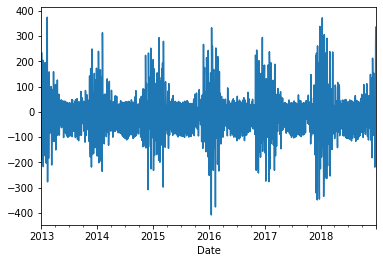

In [ ]:
# detrend
#응용: 원래 데이터에서 Trend 제거. seasonal 제거하면 deseasonal
(daily_data['sum'] - decomposition.trend).plot()

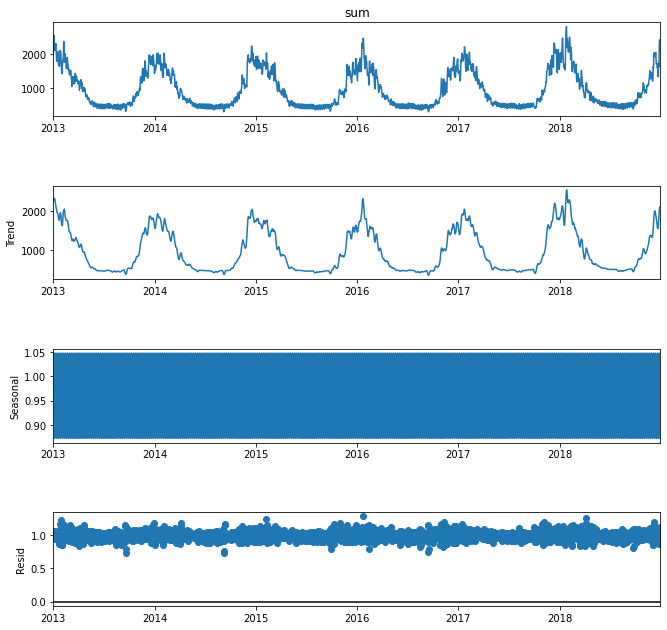

In [ ]:
## Decomposition
decomposition = sm.tsa.seasonal_decompose(daily_data['sum'], model='multiplicative') # 시계열 분해를 한 다음에, decompostion이라는 변수에 결과를 저장.
fig = decomposition.plot() # 결과에서 그림을 추출.
fig.set_size_inches(10, 10)
plt.show()

In [ ]:
decomposition.seasonal.dropna()

Date
2013-01-01    1.046321
2013-01-02    1.043763
2013-01-03    1.047982
2013-01-04    1.037602
2013-01-05    0.933718
                ...   
2018-12-27    1.047982
2018-12-28    1.037602
2018-12-29    0.933718
2018-12-30    0.872269
2018-12-31    1.018346
Freq: D, Name: seasonal, Length: 2191, dtype: float64

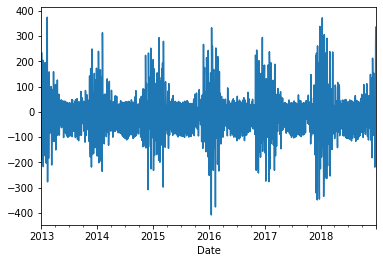

In [ ]:
## detrend
((daily_data['sum'] - decomposition.trend ).plot())

#정상화

In [ ]:
import numpy as np # numpy <= 숫자를 다루는 라이브러리.
log_data = np.log(daily_data.copy()) #로그 씌움

In [ ]:
log_data

,sum
Date,
2013-01-01,7.580068
2013-01-02,7.756478
2013-01-03,7.847888
2013-01-04,7.830301
2013-01-05,7.734535
...,...
2018-12-27,7.733701
2018-12-28,7.794459
2018-12-29,7.699887


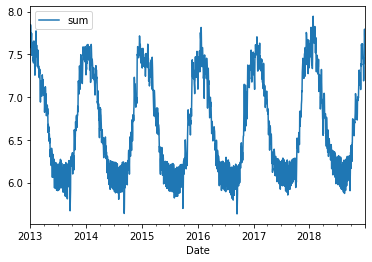

In [ ]:
log_data.plot()

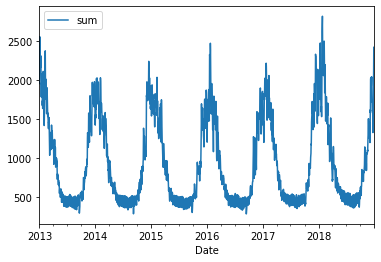

In [ ]:
daily_data.plot()

#train,test 분할

In [ ]:
# split => 시계열에서는 다르게 => shuffle=False (시간 순서 무너지므로 섞으면 안 됨)
train_data, test_data = train_test_split(daily_data, test_size=0.2, shuffle=False)

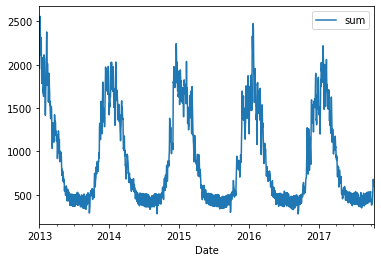

In [ ]:
train_data.plot()

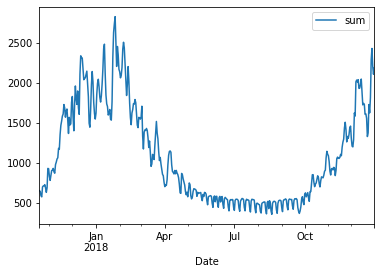

In [ ]:
test_data.plot()

In [ ]:
train_data.values.shape

(1752, 1)

In [ ]:
train_data.values.squeeze().shape

(1752,)

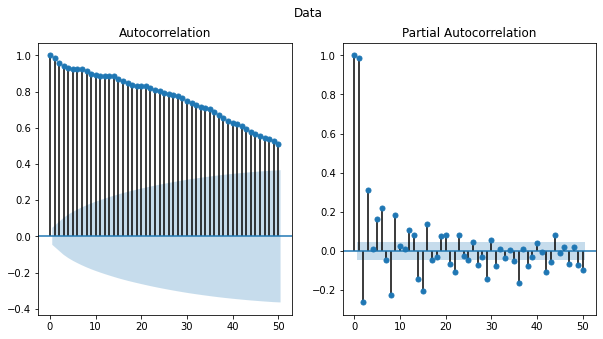

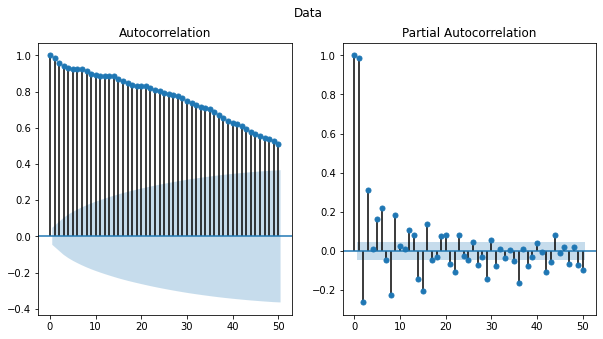

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Data')

sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=50, ax=ax[0]) #acf 그리기
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=50, ax=ax[1]) #pacf그리기

#train, test 정상화 과정

In [ ]:
train_data

,sum
Date,
2013-01-01,1958.761619
2013-01-02,2336.659952
2013-01-03,2560.321333
2013-01-04,2515.686048
2013-01-05,2285.946429
...,...
2017-10-14,647.353446
2017-10-15,601.512488
2017-10-16,640.540488


In [ ]:
import numpy as np
log_train_data = np.log(train_data.copy()) # train_data를 로그를 씌움
log_test_data = np.log(test_data.copy()) # test_data를 로그를 씌움
diff_train_data = log_train_data['sum'].diff() # 차분 수행 (xt - xt-1)
diff_train_data.dropna(inplace=True) # 맨 앞에 값은 차분이 불가하기 때문에, 삭제

diff_train_data

Date
2013-01-02    0.176410
2013-01-03    0.091410
2013-01-04   -0.017587
2013-01-05   -0.095765
2013-01-06   -0.078461
                ...   
2017-10-14   -0.047656
2017-10-15   -0.073445
2017-10-16    0.062865
2017-10-17    0.035923
2017-10-18    0.000753
Freq: D, Name: sum, Length: 1751, dtype: float64

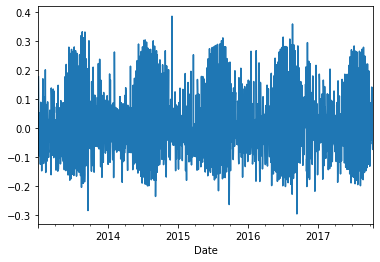

In [ ]:
# 로그를 씌우고 차분을 한 데이터.
diff_train_data.plot()

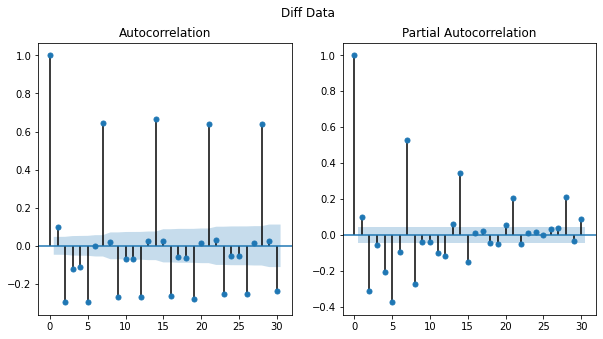

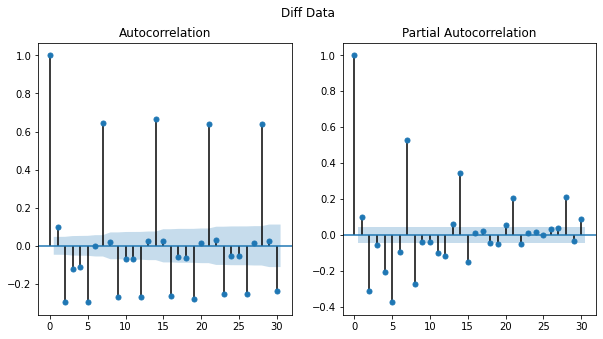

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Diff Data')

sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0]) #acf값이 작아짐. 정상시계열이라 할 수 ㄷ있다.
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1])

#모델링

In [ ]:
                  # 모델링할 데이터.           # p (AR의 윈도우), d (차분), q (MA의 윈도우)
model = SARIMAX(diff_train_data.values, order=(1,0,0) # AR(1). 차분은 이미 했으므로 불필요
#order=(1,1,1) => ARIMA(1,1,1), order(0,0,1) => MA(1)
#, seasonal_order=(2,1,1,12) (p,d,q, 계절의 주기)
) # AR(1)
history = model.fit() # 모델의 학습
history.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1751
Model:               SARIMAX(1, 0, 0)   Log Likelihood                1472.208
Date:                Tue, 15 Nov 2022   AIC                          -2940.415
Time:                        03:03:04   BIC                          -2929.479
Sample:                             0   HQIC                         -2936.373
                               - 1751                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1012      0.027      3.788      0.000       0.049       0.154
sigma2         0.0109      0.000     32.578      0.000       0.010       0.012
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):               335.24
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.89
Prob(H) (two-sided):                  0.25   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#aic 값이 많이 낮기 때문에 모델 성능이 괜찮은 것 같음

#최적의 arima 찾기

In [ ]:
p = range(0, 10) # 0,1,2
d = range(0, 2) # 0,1
q = range(0, 10) # 0,1,2


# AR(1), ARMA(1,1), MA(1), AR(2), ARMA(2,1)........

              # p,d,q 범위를 가지고 가능한 모든 조합을 찾는 것.
pdq = list(itertools.product(p, d, q)) #조합을 활용

aic = [] # ARIMA 모델들의 결과를 저장.

for i in pdq:
  model = SARIMAX(log_train_data.values, order=(i))
  model_fit = model.fit()
  aic.append(model_fit.aic)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,
/usr/local/lib/python3.7/dist-packages/statsmodels/bas

In [ ]:
# aic <= 낮으면 낮을수록 좋은값.
aic

[11630.719567118023,
 9231.202533671089,
 6986.504709505385,
 5110.971452472533,
 3633.091908869519,
 2429.1606327439395,
 2042.4801789919693,
 902.7775051734899,
 433.75209580011466,
 -102.68474841541295,
 -2924.3563219627545,
 -2964.43840495585,
 -3187.553759705973,
 -3224.3083453085587,
 -3260.403362586989,
 -3294.893264707417,
 -3345.1233002132435,
 -3648.7845591676464,
 -3650.632159615454,
 -3674.4809628188636,
 -2915.34535074754,
 -2955.6280301626693,
 -3175.225263881204,
 -3215.5762221277323,
 -3212.5020673758318,
 -3283.2179919686746,
 -3354.1891169097566,
 -3636.5159455007692,
 -3638.285508166248,
 -3660.6524699612937,
 -2940.4150909957566,
 -3059.425170768114,
 -3219.727274936339,
 -3243.2395447532863,
 -3280.2196263304804,
 -3395.6024879332954,
 -3444.9652414213247,
 -3648.5798990490603,
 -3683.3761424979434,
 -3672.3937629122124,
 -2931.4329206242837,
 -3050.7460455469363,
 -3210.296777839746,
 -3233.7188772511345,
 -3271.375144036396,
 -3386.5825371903925,
 -3435.273390058

In [ ]:
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((8, 1, 8), -4610.72079598381)]

In [ ]:
opt_model = SARIMAX(log_train_data.values, order=optimal[0][0]) # 최적 파라미터를 넣어서, opt_model
opt_model_fit = opt_model.fit() # opt_model의 실행결과를 opt_model_fit

opt_model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1752
Model:               SARIMAX(8, 1, 8)   Log Likelihood                2322.360
Date:                Tue, 15 Nov 2022   AIC                          -4610.721
Time:                        03:25:55   BIC                          -4517.766
Sample:                             0   HQIC                         -4576.360
                               - 1752                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0304      0.102      0.298      0.766      -0.169       0.230
ar.L2         -0.2736      0.052     -5.260      0.000      -0.376      -0.172
ar.L3         -0.2617      0.053     -4.984      0.000      -0.365      -0.159
ar.L4         -0.2613      0.052     -5.043      0.000      -0.363      -0.160
ar.L5         -0.2735      0.052     -5.301      0.000      -0.375      -0.172
ar.L6         -0.2631      0.051     -5.180      0.000      -0.363      -0.164
ar.L7          0.7143      0.051     13.992      0.000       0.614       0.814
ar.L8         -0.2920      0.098     -2.987      0.003      -0.484      -0.100
ma.L1          0.1792      0.104      1.729      0.084      -0.024       0.382
ma.L2          0.1639      0.058      2.849      0.004       0.051       0.277
ma.L3          0.1766      0.057      3.098      0.002       0.065       0.288
ma.L4          0.1666      0.054      3.074      0.002       0.060       0.273
ma.L5          0.1507      0.052      2.894      0.004       0.049       0.253
ma.L6          0.1310      0.048      2.747      0.006       0.038       0.225
ma.L7         -0.6093      0.044    -13.987      0.000      -0.695      -0.524
ma.L8         -0.0089      0.081     -0.109      0.913      -0.168       0.151
sigma2         0.0041   9.49e-05     43.094      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               709.32
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.14
Prob(H) (two-sided):                  0.65   Kurtosis:                         6.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#평가 

In [ ]:
                                   # 예측할 길이.
pred = opt_model_fit.get_forecast(len(log_test_data))

In [ ]:
pred # 예측 결과. [[예측값],[오차범위],[분포(하한, 상한)]]

In [ ]:
test_data

,sum
Date,
2017-10-19,649.381024
2017-10-20,641.760220
2017-10-21,586.984060
2017-10-22,573.526018
2017-10-23,696.841208
...,...
2018-12-27,2284.040345
2018-12-28,2427.115863
2018-12-29,2208.099351


In [ ]:
pred.predicted_mean

array([6.50677614, 6.51020853, 6.4084467 , 6.32462936, 6.42671712,
       6.45776285, 6.46068078, 6.47965664, 6.49451341, 6.40133739,
       6.32320691, 6.42590987, 6.45731559, 6.45892465, 6.4781968 ,
       6.49424492, 6.40240488, 6.32554821, 6.42657733, 6.45726365,
       6.45718255, 6.47662039, 6.49382611, 6.40333526, 6.32775804,
       6.42719465, 6.45720128, 6.45549048, 6.4750855 , 6.49340942,
       6.40423824, 6.3299047 , 6.42779777, 6.45714505, 6.45385342,
       6.47359281, 6.49299493, 6.40511406, 6.33198945, 6.4283865 ,
       6.45709436, 6.45226959, 6.47214111, 6.49258276, 6.40596354,
       6.33401411, 6.42896106, 6.45704893, 6.45073737, 6.47072926,
       6.49217306, 6.40678749, 6.33598046, 6.42952169, 6.45700847,
       6.44925522, 6.46935618, 6.49176598, 6.40758673, 6.33789022,
       6.43006865, 6.4569727 , 6.4478216 , 6.46802081, 6.49136162,
       6.408362  , 6.33974508, 6.43060217, 6.45694136, 6.44643507,
       6.46672212, 6.49096013, 6.40911406, 6.34154664, 6.43112

In [ ]:
np.exp(pred.predicted_mean) # 실제 예측 값 (로그를 씌운) 로그 씌웠으므로 다시 지수를 취함

array([669.66402788, 671.96652887, 606.95017469, 558.15090391,
       618.1413301 , 637.63297874, 639.49626201, 651.74712648,
       661.5022654 , 602.65047978, 557.35752392, 617.64253792,
       637.34785583, 638.37420909, 650.79637363, 661.32468126,
       603.29414292, 558.66399291, 618.05492635, 637.31475233,
       637.26307011, 649.77125553, 661.04777401, 603.85569789,
       559.89991249, 618.4365797 , 637.27500215, 636.185683  ,
       648.77469324, 660.77237871, 604.40121648, 561.10311994,
       618.80968783, 637.23916828, 635.14506615, 647.80699985,
       660.49854909, 604.93079145, 562.27409719, 619.17410132,
       637.20687183, 634.13989889, 646.8672576 , 660.22636822,
       605.44488517, 563.41366346, 619.52995603, 637.17792391,
       633.16900305, 645.95462531, 659.95593157, 605.94395274,
       564.52262137, 619.87738614, 637.15214199, 632.23124113,
       645.06828826, 659.68732703, 606.42843681, 565.60175686,
       620.21652561, 637.12935125, 631.32551585, 644.20

In [ ]:
# lower bound (하한선)
pred.conf_int()[:,0]

array([6.3814527 , 6.31352667, 6.1678188 , 6.05556872, 6.13802819,
       6.15528799, 6.14816638, 6.15127832, 6.1506485 , 6.04459604,
       5.95516764, 6.04767948, 6.07046606, 6.06494989, 6.07197644,
       6.07555725, 5.97311885, 5.88679811, 5.97915462, 6.00246978,
       5.99625608, 6.00522222, 6.01168692, 5.91201246, 5.82815421,
       5.91991139, 5.94337122, 5.93618617, 5.94650475, 5.95526928,
       5.85789808, 5.77611412, 5.86702888, 5.89041692, 5.88212316,
       5.89345891, 5.9041747 , 5.80882858, 5.72887792, 5.81882499,
       5.84201919, 5.83255159, 5.84469322, 5.85712792, 5.76361963,
       5.68533567, 5.77424894, 5.79717571, 5.78650628, 5.79930886,
       5.81329401, 5.72148706, 5.64474553, 5.73259192, 5.75520537,
       5.74332722, 5.75668515, 5.77209098, 5.68187989, 5.60658275,
       5.69334902, 5.71562035, 5.7025393 , 5.71637203, 5.73309392,
       5.64439349, 5.57046008, 5.65614553, 5.67805696, 5.66378692,
       5.67803077, 5.69598141, 5.60872038, 5.53608217, 5.62069

In [ ]:
# upper bound (상한선)
np.exp(pred.conf_int()[:,1])

array([ 759.07422765,  818.02295168,  772.0695298 ,  730.47134825,
        825.01869867,  862.84728036,  874.1003332 ,  905.09052971,
        932.97491447,  860.98643533,  805.32520822,  901.57232089,
        938.38951358,  946.62156505,  976.93211541, 1005.19073138,
        926.75654349,  866.35807377,  966.80811161, 1004.3115134 ,
       1010.40753029, 1041.08482335, 1070.59013292,  986.98817567,
        922.75325459, 1027.08287876, 1065.32088314, 1069.33771273,
       1100.6610626 , 1131.78301946, 1043.75326779,  976.22714536,
       1084.16639688, 1123.12826968, 1125.05104375, 1157.1631326 ,
       1190.12682484, 1098.16900325, 1027.72302622, 1139.04787998,
       1178.70249474, 1178.48805843, 1211.46905358, 1246.42857276,
       1150.90910812, 1077.81652847, 1192.34015532, 1232.65068553,
       1230.2448166 , 1264.1429534 , 1301.21290546, 1202.41573859,
       1126.88828167, 1244.45314612, 1285.38243002, 1280.72705927,
       1315.57251479, 1354.84315324, 1252.99700656, 1175.20477

In [ ]:
predicted_values = np.exp(pred.predicted_mean)
pred_lb = np.exp(pred.conf_int()[:,0]) # lb => lower bound
pred_ub = np.exp(pred.conf_int()[:,1]) # ub => upper bound

In [ ]:
predicted_values

array([669.66402788, 671.96652887, 606.95017469, 558.15090391,
       618.1413301 , 637.63297874, 639.49626201, 651.74712648,
       661.5022654 , 602.65047978, 557.35752392, 617.64253792,
       637.34785583, 638.37420909, 650.79637363, 661.32468126,
       603.29414292, 558.66399291, 618.05492635, 637.31475233,
       637.26307011, 649.77125553, 661.04777401, 603.85569789,
       559.89991249, 618.4365797 , 637.27500215, 636.185683  ,
       648.77469324, 660.77237871, 604.40121648, 561.10311994,
       618.80968783, 637.23916828, 635.14506615, 647.80699985,
       660.49854909, 604.93079145, 562.27409719, 619.17410132,
       637.20687183, 634.13989889, 646.8672576 , 660.22636822,
       605.44488517, 563.41366346, 619.52995603, 637.17792391,
       633.16900305, 645.95462531, 659.95593157, 605.94395274,
       564.52262137, 619.87738614, 637.15214199, 632.23124113,
       645.06828826, 659.68732703, 606.42843681, 565.60175686,
       620.21652561, 637.12935125, 631.32551585, 644.20

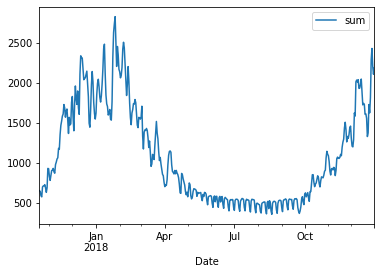

In [ ]:
test_data.plot()

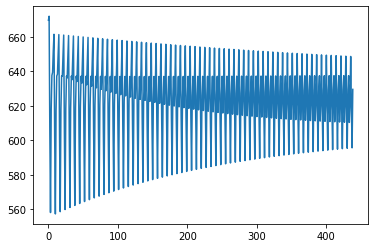

In [ ]:
plt.plot(predicted_values)

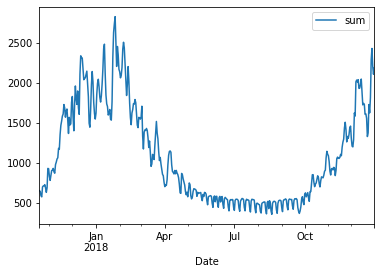

In [ ]:
test_data.plot()

In [ ]:
daily_data.head()

,sum
Date,
2013-01-01,1958.761619
2013-01-02,2336.659952
2013-01-03,2560.321333
2013-01-04,2515.686048
2013-01-05,2285.946429


In [ ]:
test_data

,sum
Date,
2017-10-19,649.381024
2017-10-20,641.760220
2017-10-21,586.984060
2017-10-22,573.526018
2017-10-23,696.841208
...,...
2018-12-27,2284.040345
2018-12-28,2427.115863
2018-12-29,2208.099351


Text(0.5, 0.98, 'ARIMA (8, 1, 8) Prediction Result (r2 score: -0.5855713853077689')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)


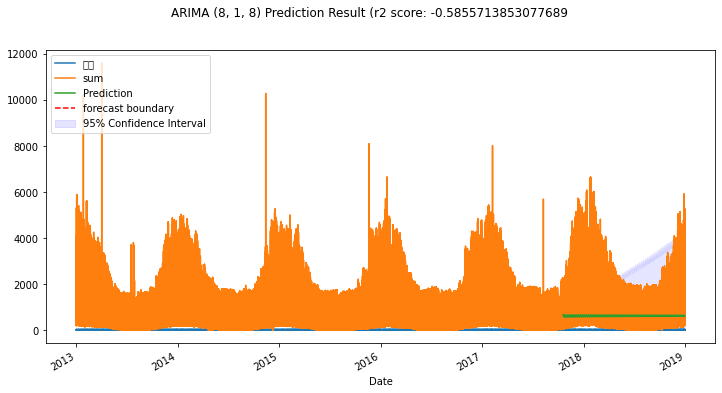

In [ ]:
#예측 결과 시각화
fig = plt.figure(figsize = (12,6)) # 큰 그림 하나 준비.
ax = fig.add_subplot(111)

pred_index = list(test_data.index) # 예측 시작 기준점.
r2 = r2_score(test_data, predicted_values)

data.plot(ax=ax)
ax.vlines('2017-10-19', 0, 1000, linestyle='--', color='r', label='forecast boundary') # 예측을 시작할 기준점에다가 라인을 그림
ax.fill_between(pred_index, pred_lb, pred_ub, color='b', alpha=0.1, label='95% Confidence Interval') # 예측 시작한 후 기준 점 다음에, 상한 / 하한.
ax.plot(pred_index, predicted_values, label='Prediction')
ax.legend(loc='upper left')
plt.suptitle(f"ARIMA {optimal[0][0]} Prediction Result (r2 score: {r2}")
# plt.show()

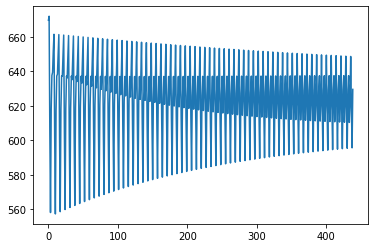

In [ ]:
plt.plot(predicted_values) #예측값만 분리하여 그림

In [ ]:
#SARIMA모델 사용. seasonal_order변수가 추가됨
                                           # ARIMA 차수     # 계절성 차트의 차수.                        
opt_model = SARIMAX(diff_train_data.values, order=(2,0,1), seasonal_order=(2,0,1,12))
opt_model_fit = opt_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,


In [ ]:
pred = opt_model_fit.get_forecast(len(test_data))

In [ ]:
help(opt_model_fit.get_forecast)

Help on method get_forecast in module statsmodels.tsa.statespace.mlemodel:

get_forecast(steps=1, **kwargs) method of statsmodels.tsa.statespace.sarimax.SARIMAXResults instance
    Out-of-sample forecasts and prediction intervals
    
    Parameters
    ----------
    steps : int, str, or datetime, optional
        If an integer, the number of steps to forecast from the end of the
        sample. Can also be a date string to parse or a datetime type.
        However, if the dates index does not have a fixed frequency, steps
        must be an integer. Default
    **kwargs
        Additional arguments may required for forecasting beyond the end
        of the sample. See `FilterResults.predict` for more details.
    
    Returns
    -------
    predictions : PredictionResults
        PredictionResults instance containing in-sample predictions and
        out-of-sample forecasts.



In [ ]:
help(opt_model_fit.get_prediction)

Help on method get_prediction in module statsmodels.tsa.statespace.mlemodel:

get_prediction(start=None, end=None, dynamic=False, index=None, exog=None, extend_model=None, extend_kwargs=None, **kwargs) method of statsmodels.tsa.statespace.sarimax.SARIMAXResults instance
    In-sample prediction and out-of-sample forecasting
    
    Parameters
    ----------
    start : int, str, or datetime, optional
        Zero-indexed observation number at which to start forecasting,
        i.e., the first forecast is start. Can also be a date string to
        parse or a datetime type. Default is the the zeroth observation.
    end : int, str, or datetime, optional
        Zero-indexed observation number at which to end forecasting, i.e.,
        the last forecast is end. Can also be a date string to
        parse or a datetime type. However, if the dates index does not
        have a fixed frequency, end must be an integer index if you
        want out of sample prediction. Default is the last o

In [ ]:
pred.conf_int()

array([[-0.20066164,  0.17035108],
       [-0.20223556,  0.169484  ],
       [-0.22211567,  0.16546291],
       [-0.2238295 ,  0.17478377],
       [-0.21314918,  0.18696727],
       [-0.23053064,  0.16961824],
       [-0.20953295,  0.19093051],
       [-0.19451218,  0.206091  ],
       [-0.19041139,  0.21020133],
       [-0.21479264,  0.18582285],
       [-0.20514427,  0.19547676],
       [-0.19498014,  0.20564247],
       [-0.20143313,  0.20477625],
       [-0.20248922,  0.20373857],
       [-0.19360029,  0.21312322],
       [-0.1922329 ,  0.21484272],
       [-0.19626838,  0.21085524],
       [-0.1895464 ,  0.21757835],
       [-0.19930294,  0.20783212],
       [-0.20655613,  0.20058345],
       [-0.2085643 ,  0.19857559],
       [-0.19726854,  0.20987144],
       [-0.20119048,  0.20594968],
       [-0.20546844,  0.20167177],
       [-0.20502147,  0.20329043],
       [-0.2046744 ,  0.20364173],
       [-0.20824144,  0.20017792],
       [-0.20876786,  0.19972546],
       [-0.20711948,

Text(0.5, 0.98, 'ARIMA (8, 1, 8) Prediction Result (r2 score: -3.2608503722130564')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)


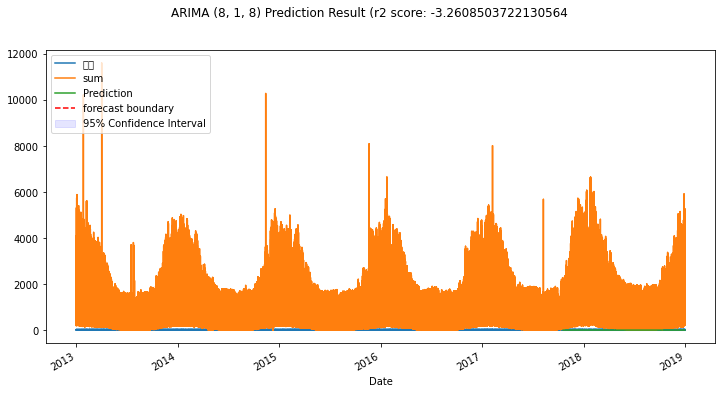

In [ ]:
pred = opt_model_fit.get_forecast(len(log_test_data))
predicted_values = np.exp(pred.predicted_mean)
pred_lb = np.exp(pred.conf_int()[:,0]) # 하한선
pred_ub = np.exp(pred.conf_int()[:,1]) # 상한선

pred_index = list(test_data.index)
r2 = r2_score(test_data, predicted_values)

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
data.plot(ax=ax)
ax.vlines('2017-10-19', 0, 1000, linestyle='--', color='r', label='forecast boundary')
ax.fill_between(pred_index, pred_lb, pred_ub, color='b', alpha=0.1, label='95% Confidence Interval')
ax.plot(pred_index, predicted_values, label='Prediction')
ax.legend(loc='upper left')
plt.suptitle(f"ARIMA {optimal[0][0]} Prediction Result (r2 score: {r2}")
# plt.show()

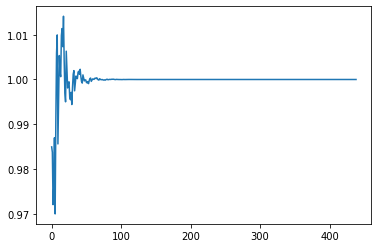

In [ ]:
plt.plot(predicted_values)

In [ ]:
# ARIMA 모델의 차수를 찾는 과정을 자동화.
# p,d,q <= 어떤게 최적인지 찾는 부분을 자동화.

auto_arima_model = auto_arima(diff_train_data, start_p = 1, start_q = 1,
                              max_p = 3, max_q = 3, m = 12, seasonal=True,
                              d = 1, D=1,
                              max_P=3, max_Q=3,
                              trace=True,
                              error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=13.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-245.669, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1287.506, Time=1.67 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=6.71 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-305.357, Time=0.21 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-1561.072, Time=3.64 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=-1685.879, Time=7.92 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=46.96 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=26.42 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=-1373.759, Time=6.56 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=-1920.998, Time=11.95 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-1753.139, Time=5.60 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=44.55 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=37.38 sec
 ARIMA(3,1,0)(3,1,0)[12]             

In [ ]:
pred = auto_arima_model.get_forecast(len(log_test_data))
predicted_values = np.exp(pred.predicted_mean)
pred_lb = np.exp(pred.conf_int()[:,0])
pred_ub = np.exp(pred.conf_int()[:,1])

pred_index = list(test_data.index)
r2 = r2_score(test_data, predicted_values)

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
data.plot(ax=ax)
ax.vlines('2017-10-19', 0, 1000, linestyle='--', color='r', label='forecast boundary')
ax.fill_between(pred_index, pred_lb, pred_ub, color='b', alpha=0.1, label='95% Confidence Interval')
ax.plot(pred_index, predicted_values, label='Prediction')
ax.legend(loc='upper left')
plt.suptitle(f"ARIMA {optimal[0][0]} Prediction Result (r2 score: {r2}")
# plt.show()

AttributeError: ignored

#new

In [ ]:
 from statsmodels.tsa.stattools import adfuller

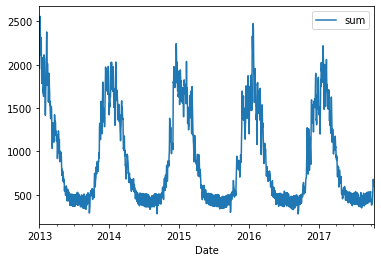

In [ ]:
train_data.plot()

In [ ]:
result = adfuller(train_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
#p value값이 높으므로 기각.

ADF Statistic: -2.553124
p-value: 0.103078
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


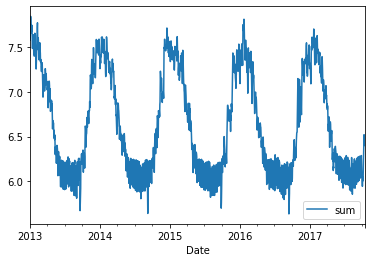

In [ ]:
np.log(train_data).plot()

In [ ]:
result = adfuller(np.log(train_data))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.601604
p-value: 0.092666
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


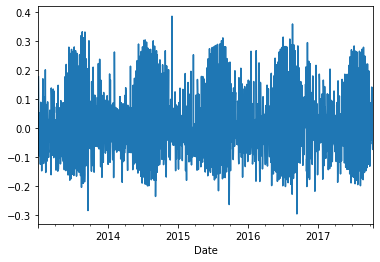

In [ ]:
diff_train_data.plot()

In [ ]:
result = adfuller(diff_train_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.632113
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


#모델링 2

In [ ]:
total = pd.read_csv('/content/drive/MyDrive/2022-2 Dscover 프로젝트/final project/한국가스공사_시간별 공급량_20181231.csv', encoding='cp949')

In [ ]:
total.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

all_df = pd.read_csv(
    '/content/drive/MyDrive/2022-2 Dscover 프로젝트/final project/한국가스공사_시간별 공급량_20181231.csv', encoding = 'cp949', 
    header=0, 
    infer_datetime_format=True, 
    parse_dates=['연월일'], 
    index_col=['연월일'])

In [ ]:
all_df.head()

,시간,구분,공급량
연월일,,,
2013-01-01,1,A,2497.129
2013-01-01,2,A,2363.265
2013-01-01,3,A,2258.505
2013-01-01,4,A,2243.969
2013-01-01,5,A,2344.105


In [ ]:
daily_groups = all_df.resample('D') # D = Day 분단위 => 일단위
daily_data = daily_groups.sum() # 합칠 연산 (더하기, 평균)
# daily_data = daily_groups.mean()

In [ ]:
daily_data = daily_data.drop(columns = ['시간'], axis = 1)

In [ ]:
daily_data

,공급량
연월일,
2013-01-01,329071.952
2013-01-02,392558.872
2013-01-03,430133.984
2013-01-04,422635.256
2013-01-05,384039.000
...,...
2018-12-27,383718.778
2018-12-28,407755.465
2018-12-29,370960.691


In [ ]:
dataset = daily_data

##데이터 스플릿

In [ ]:
import numpy as np
from numpy import split
from numpy import array

# 1주 단위.
def split_dataset(data):
	train, test = data[1:-328], data[-328:-6]

	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

In [ ]:
train, test = split_dataset(dataset.values)
# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])
# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])

(266, 7, 1)
392558.872 420726.418
(46, 7, 1)
409058.763 272660.01900000003


##예측 후 결과 확인

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_forecasts(actual, predicted):
	scores = list()
	for i in range(actual.shape[1]):
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		rmse = sqrt(mse)
		scores.append(rmse)
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

In [ ]:
def evaluate_model(train, test, n_input):
	model = build_model(train, n_input)
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		yhat_sequence = forecast(model, history, n_input)
		predictions.append(yhat_sequence)
		history.append(test[i, :])
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

In [ ]:
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

In [ ]:
def to_supervised(train, n_input, n_out=7):
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	for _ in range(len(data)):
		in_end = in_start + n_input
		out_end = in_end + n_out
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		in_start += 1
	return array(X), array(y)

##모델링

In [ ]:
import tensorflow as tf

tf.random.set_seed(2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

def build_model(train, n_input):
    train_x, train_y = to_supervised(train, n_input)
    verbose, epochs, batch_size = 0, 20, 16
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
    
    model = Sequential()

                # conv => 요약된 정보의 차원:64, kernel_size=window 사이즈, 3 
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
	          input_shape=(n_timesteps, n_features)))
                # conv => 64차원, window 3
    model.add(MaxPooling1D(pool_size=2)) # 중요한 정보만 남김
    model.add(Flatten())  # 펼침
    model.add(RepeatVector(n_outputs)) # 펼친 벡터를 LSTM에다가 각각 입력으로 넣음.
    model.add(LSTM(200, activation='relu', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(200, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(100, activation='relu'))) # LSTM의 리턴값으로 받은 시퀀스 각각에 대해 수행
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss='mse', optimizer='adam')
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model
 
def forecast(model, history, n_input):
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	input_x = data[-n_input:, 0]
	input_x = input_x.reshape((1, len(input_x), 1))
	yhat = model.predict(input_x, verbose=0)
	yhat = yhat[0]
	return yhat


lstm: [82069.985] 98553.1, 93858.5, 91226.1, 73877.6, 64458.9, 75903.3, 70213.2


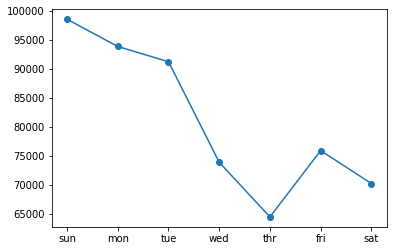

In [ ]:

import matplotlib.pyplot as plt

n_input = 14
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
plt.plot(days, scores, marker='o', label='lstm')
plt.show()

In [ ]:
dataset

,공급량
연월일,
2013-01-01,329071.952
2013-01-02,392558.872
2013-01-03,430133.984
2013-01-04,422635.256
2013-01-05,384039.000
...,...
2018-12-27,383718.778
2018-12-28,407755.465
2018-12-29,370960.691


#모델링3(CNN)

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text

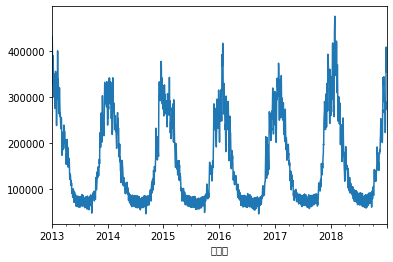

In [ ]:
dataset['공급량'].plot()

In [ ]:
df = dataset

In [ ]:
df.index.max()

Timestamp('2018-12-31 00:00:00', freq='D')

In [ ]:
# Block
test_cutoff_date = df.index.max() - timedelta(days=90)

df_test = df[df.index > test_cutoff_date]['공급량']
df_train = df[df.index <= test_cutoff_date]['공급량']

##탐색

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text

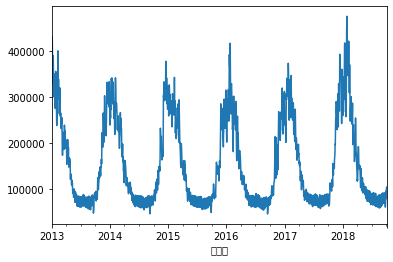

In [ ]:
df_train.plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text

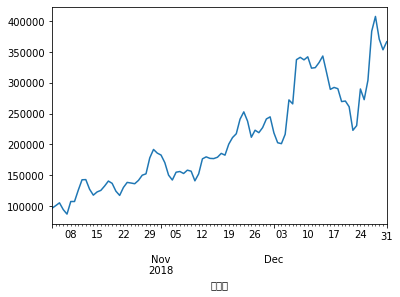

In [ ]:
df_test.plot()

In [ ]:
from numpy import array

# Block: 30일치 보고 1일치 예측

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

raw_seq = df_train
n_steps = 30

X, y = split_sequence(raw_seq, n_steps)

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
X.shape

(2071, 30, 1)

In [ ]:
y.shape

(2071,)

In [ ]:
# CNN 모델을 만드는 부분.
# TCN (Temporal Conv. NN)
model = keras.Sequential()
                       #  30, 1
model.add(layers.Conv1D(
    filters=64, # 요약된 정보의 차원의 갯수
    kernel_size=2, # 요약을 할 time window의 크기. 
    activation='relu', 
    input_shape=(n_steps, 1))) # 29, 64 since kernel_size=2
model.add(layers.MaxPooling1D(pool_size=2)) # 14,64
model.add(layers.Conv1D(
    filters=128, 
    kernel_size=2, 
    activation='relu')) # 13,128
model.add(layers.MaxPooling1D(pool_size=2)) # 6,128
model.add(layers.Conv1D(
    filters=256,
    kernel_size=2, 
    activation='relu')) # 5, 256
model.add(layers.MaxPooling1D(pool_size=2)) # 2, 256
model.add(layers.Flatten()) # 512
model.add(layers.Dense(50, activation='relu')) # 뉴럴 네트워크
model.add(layers.Dense(1))

        # 그라이언트를 계산
# model.compile(optimizer='adam', loss='mae')
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 29, 64)            192       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 14, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 128)           16512     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 6, 128)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 5, 256)            65792     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2, 256)          

In [ ]:
history = model.fit(X, y, epochs=100, batch_size=64)

Epoch 1/100
33/33 [==============================] - 3s 24ms/step - loss: 4584257536.0000
Epoch 2/100
33/33 [==============================] - 0s 15ms/step - loss: 1653469696.0000
Epoch 3/100
33/33 [==============================] - 0s 14ms/step - loss: 1487046400.0000
Epoch 4/100
33/33 [==============================] - 0s 14ms/step - loss: 1411969536.0000
Epoch 5/100
33/33 [==============================] - 0s 14ms/step - loss: 1349342080.0000
Epoch 6/100
33/33 [==============================] - 0s 14ms/step - loss: 1316717952.0000
Epoch 7/100
33/33 [==============================] - 0s 14ms/step - loss: 1224749952.0000
Epoch 8/100
33/33 [==============================] - 0s 14ms/step - loss: 1222542208.0000
Epoch 9/100
33/33 [==============================] - 0s 14ms/step - loss: 1183219968.0000
Epoch 10/100
33/33 [==============================] - 0s 14ms/step - loss: 1209722624.0000
Epoch 11/100
33/33 [==============================] - 0s 14ms/step - loss: 1336394880.0000
Epoch 12

In [ ]:
train_pred = model.predict(X)

65/65 [==============================] - 0s 5ms/step


In [ ]:
train_pred

array([[283394.47 ],
       [275539.88 ],
       [262171.72 ],
       ...,
       [ 72736.05 ],
       [ 88518.836],
       [ 85483.66 ]], dtype=float32)

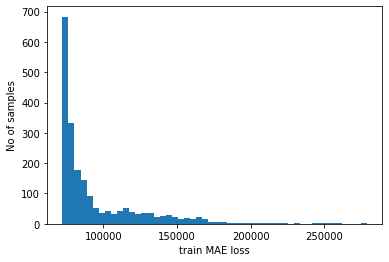

In [ ]:
train_mae_loss = np.mean(np.abs(train_pred - y), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("train MAE loss")
plt.ylabel("No of samples")
plt.show()

In [ ]:
train_df_with_pred = df_train.to_frame()[n_steps:]
train_df_with_pred['pred'] = train_pred

In [ ]:
train_df_with_pred

,공급량,pred
연월일,,
2013-01-31,250501.480,283394.468750
2013-02-01,238132.808,275539.875000
2013-02-02,255601.048,262171.718750
2013-02-03,284607.024,280307.875000
2013-02-04,294500.256,308821.562500
...,...,...
2018-09-28,96635.477,87047.765625
2018-09-29,85315.943,78263.937500
2018-09-30,80007.700,72736.046875


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text

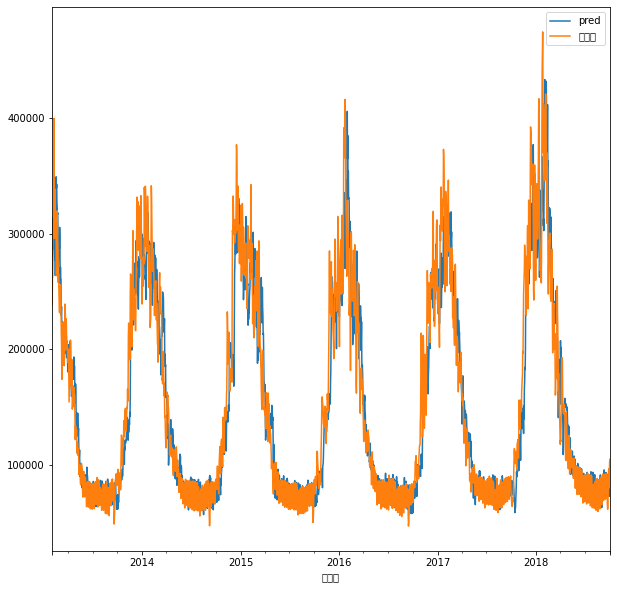

In [ ]:
# Lagging = 예측값이 실제 값보다 N 스텝 앞에 있는 경우
# Forwarding = 예측값이 실제 값보다 N 스텝 뒤에 있는 경우
fig, ax = plt.subplots(figsize=(10,10))
train_df_with_pred['pred'].plot(ax=ax, legend=True)
train_df_with_pred['공급량'].plot(ax=ax, legend=True)
#Lagging이 생기긴 하나 RNN과 달리 Forwarding과 섞여서 생김. 모델을 잘 튜닝하면 이들을 최소화할 수 있다.

In [ ]:
test_raw_seq = df_test

test_X, test_y = split_sequence(test_raw_seq, n_steps)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

In [ ]:
test_X.shape

(60, 30, 1)

In [ ]:
y_pred = model.predict(test_X)

2/2 [==============================] - 0s 8ms/step


In [ ]:
y_pred.shape

(60, 1)

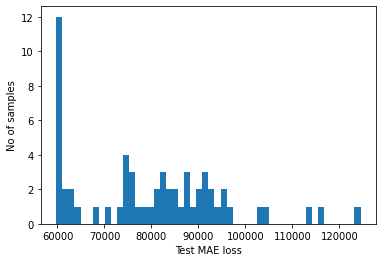

In [ ]:
test_mae_loss = np.mean(np.abs(y_pred - test_y), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel("Test MAE loss")
plt.ylabel("No of samples")
plt.show()

In [ ]:
test_df_with_pred = df_test.to_frame()[n_steps:]
test_df_with_pred['pred'] = y_pred

In [ ]:
test_df_with_pred

,공급량,pred
연월일,,
2018-11-02,170504.666,129953.640625
2018-11-03,150201.762,132292.093750
2018-11-04,142228.149,121715.539062
2018-11-05,154908.783,142520.843750
2018-11-06,156047.072,152281.500000
2018-11-07,152836.309,181990.687500
2018-11-08,158248.830,163389.250000
2018-11-09,156566.916,175761.218750
2018-11-10,140928.031,155950.093750


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text

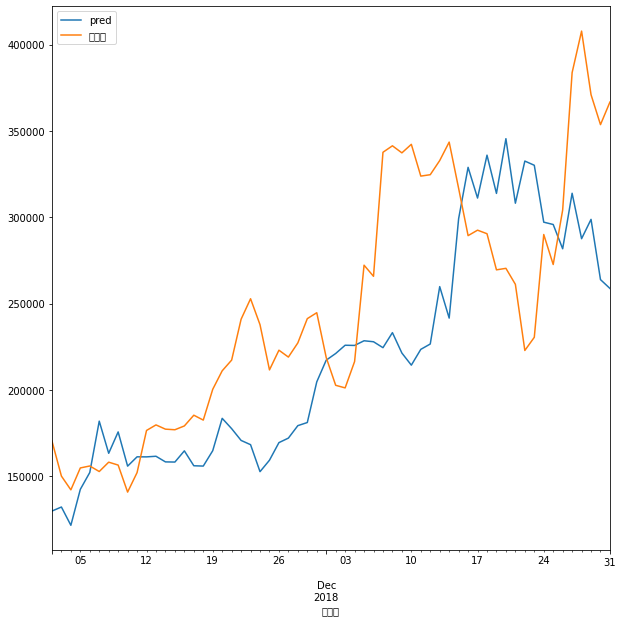

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
test_df_with_pred['pred'].plot(ax=ax, legend=True)
test_df_with_pred['공급량'].plot(ax=ax, legend=True)

##모델링2

In [ ]:
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		if out_end_ix > len(sequence):
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
raw_seq = df_train

n_steps_in, n_steps_out = 60, 7
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
X.shape

(2035, 60, 1)

In [ ]:
model = keras.Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
# 모델을 추가. (Seq2seq, Encoder-Decoder)
# 내가 출력할 시계열에 어떤 특징이 없을때
model.add(layers.Dense(n_steps_out))
model.compile(optimizer='adam', loss='mae')
# model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 59, 64)            192       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 29, 64)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1856)              0         
                                                                 
 dense_4 (Dense)             (None, 50)                92850     
                                                                 
 dense_5 (Dense)             (None, 7)                 357       
                                                                 
Total params: 93,399
Trainable params: 93,399
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(X, y, epochs=100)

Epoch 1/100
64/64 [==============================] - 1s 9ms/step - loss: 43852.6992
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - loss: 21591.5957
Epoch 3/100
64/64 [==============================] - 0s 7ms/step - loss: 20378.9297
Epoch 4/100
64/64 [==============================] - 0s 6ms/step - loss: 18694.6504
Epoch 5/100
64/64 [==============================] - 0s 6ms/step - loss: 18044.5840
Epoch 6/100
64/64 [==============================] - 0s 6ms/step - loss: 17705.0215
Epoch 7/100
64/64 [==============================] - 0s 5ms/step - loss: 18629.4531
Epoch 8/100
64/64 [==============================] - 0s 5ms/step - loss: 17744.5820
Epoch 9/100
64/64 [==============================] - 0s 6ms/step - loss: 17269.9395
Epoch 10/100
64/64 [==============================] - 0s 6ms/step - loss: 16976.4453
Epoch 11/100
64/64 [==============================] - 0s 6ms/step - loss: 17363.6543
Epoch 12/100
64/64 [==============================] - 0s 6ms/step - loss:

64/64 [==============================] - 0s 3ms/step


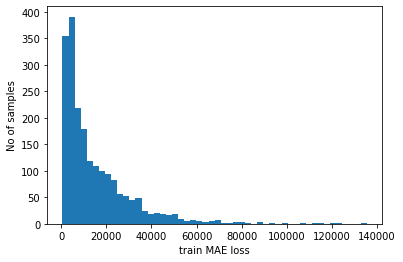

In [ ]:
train_pred = model.predict(X)

train_mae_loss = np.mean(np.abs(train_pred - y), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("train MAE loss")
plt.ylabel("No of samples")
plt.show()

In [ ]:
train_pred.shape

(2035, 7)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

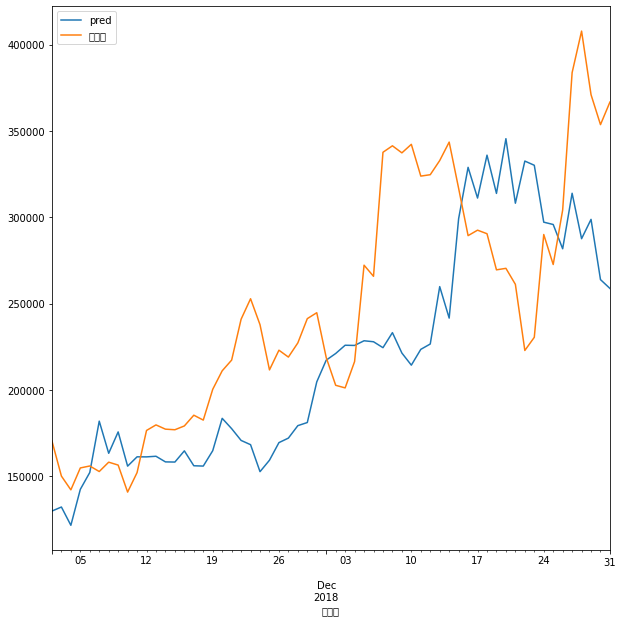

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

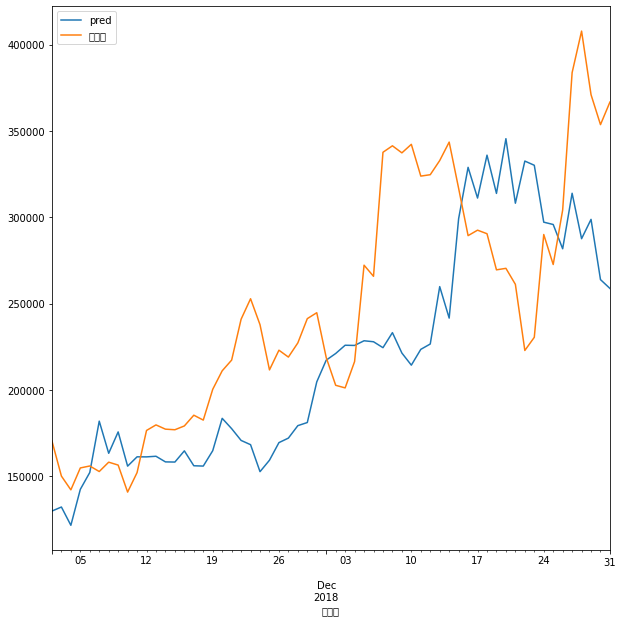

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

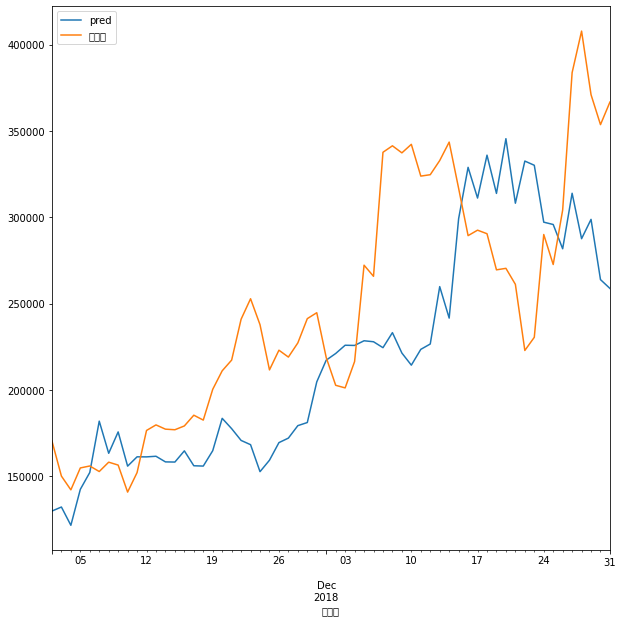

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

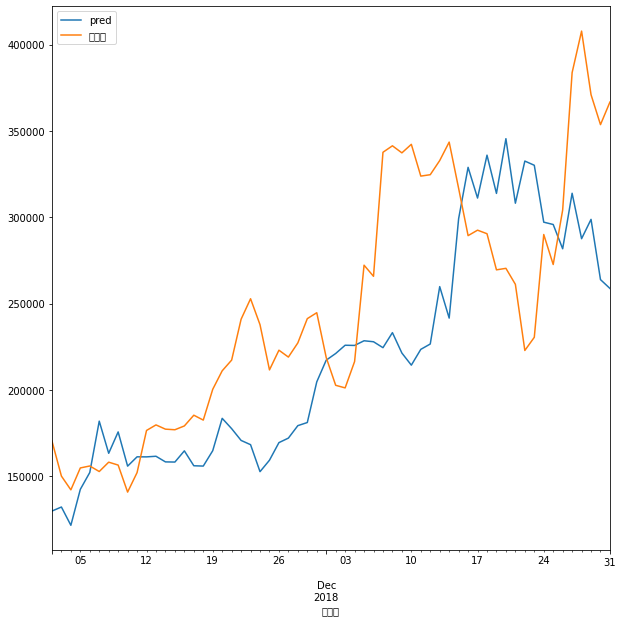

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

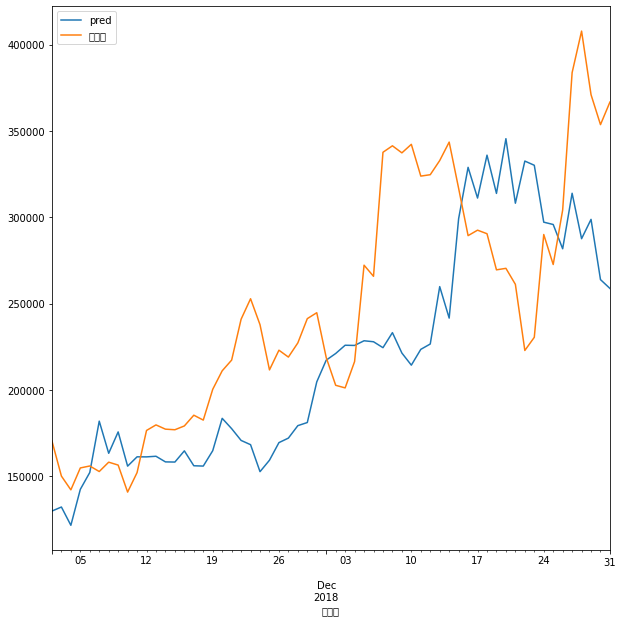

In [ ]:
for i, pred in enumerate(train_pred[:5]):
  train_df_with_pred = df_train[i:i+n_steps_out]
  train_df_with_pred['pred'] = pred
  
  fig, ax = plt.subplots(figsize=(10,10))
  test_df_with_pred['pred'].plot(ax=ax, legend=True)
  test_df_with_pred['공급량'].plot(ax=ax, legend=True)
  plt.show()